In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd

In [11]:
# Loading the data set from the csv file
df = pd.read_csv("/content/drive/MyDrive/Dataset/breast-cancer_with_header.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [26]:
ageStats = df['age'].describe()
print("\nage Statistics is:",ageStats)

menopauseStats = df['menopause'].describe()
print("\nmenopause Statistics is:",menopauseStats)

tumor_sizeStats = df['tumor_size'].describe()
print("\ntumor_size Statistics is:",tumor_sizeStats)

inv_nodesStats = df['inv_nodes'].describe()
print("\ninv_nodes Statistics is:", inv_nodesStats)

nodecapsStats = df['node_caps'].describe()
print("\nnode_caps Statistics is:", nodecapsStats)

degmaligStats = df['deg_malig'].describe()
print("\ndeg_malig Statistics is:",degmaligStats)

breastStats = df['breast'].describe()
print("\nbreast Statistics is:",breastStats)

breastquadStats = df['breast_quad'].describe()
print("\nbreast_quad Statistics is:",breastquadStats)

irradiatStats = df['irradiat'].describe()
print("\nirradiat Statistics is:",irradiatStats)



age Statistics is: count       286
unique        6
top       50-59
freq         96
Name: age, dtype: object

menopause Statistics is: count         286
unique          3
top       premeno
freq          150
Name: menopause, dtype: object

tumor_size Statistics is: count       286
unique       11
top       30-34
freq         60
Name: tumor_size, dtype: object

inv_nodes Statistics is: count     286
unique      7
top       0-2
freq      213
Name: inv_nodes, dtype: object

node_caps Statistics is: count     286
unique      3
top        no
freq      222
Name: node_caps, dtype: object

deg_malig Statistics is: count    286.000000
mean       2.048951
std        0.738217
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: deg_malig, dtype: float64

breast Statistics is: count      286
unique       2
top       left
freq       152
Name: breast, dtype: object

breast_quad Statistics is: count          286
unique           6
top       left_low

In [37]:
df.isna().sum()

,0
Class,0
age,0
menopause,0
tumor_size,0
inv_nodes,0
node_caps,0
deg_malig,0
breast,0
breast_quad,0
irradiat,0


In [32]:
X = df.drop("Class", axis=1)
y = df["Class"].map({'no-recurrence-events': 0, 'recurrence-events': 1})


In [41]:
X= pd.get_dummies(X, drop_first=True)


In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [45]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier as the estimator
estimator = RandomForestClassifier(random_state=42)

# Create an instance of RFE with the estimator and specify the number of features to select
num_features_to_select = 5  # You can adjust the number of features as needed
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE on the training dataset
rfe.fit(X_train, y_train)

# Get feature ranking and support
feature_ranking = rfe.ranking_
feature_support = rfe.support_

# Feature names selected by RFE
selected_features = X_train.columns[feature_support]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['deg_malig', 'tumor_size_30-34', 'node_caps_no', 'breast_right',
       'irradiat_yes'],
      dtype='object')


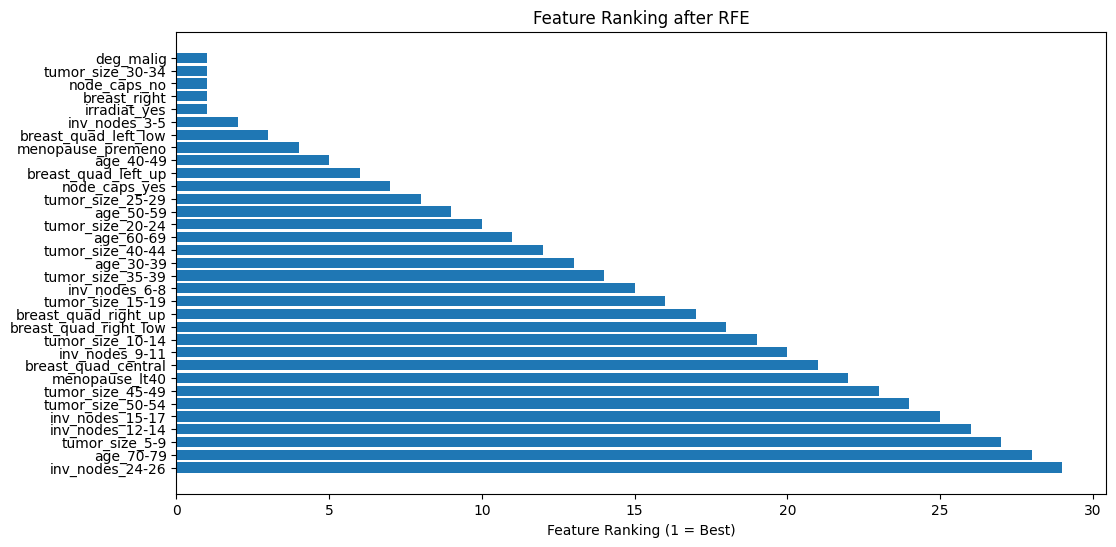

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame for ranking
feature_rank_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking
})

# Sort by ranking (1 = best feature)
feature_rank_df = feature_rank_df.sort_values(by='Ranking')

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_rank_df['Feature'], feature_rank_df['Ranking'])
plt.gca().invert_yaxis()  # Best features on top
plt.xlabel('Feature Ranking (1 = Best)')
plt.title('Feature Ranking after RFE')
plt.show()


In [47]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]



In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_selected, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [56]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

# Predict
y_pred = logreg.predict(X_test_selected)

# Probabilities for ROC-AUC
y_pred_proba = logreg.predict_proba(X_test_selected)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")

# Optional: confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

metrics_sel = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
}


Model Evaluation Metrics:
Accuracy  : 0.7069
Precision : 0.7500
Recall    : 0.2857
F1-Score  : 0.4138
ROC-AUC   : 0.7085

Confusion Matrix:
[[35  2]
 [15  6]]


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train on all features
logreg_all = LogisticRegression(max_iter=1000, random_state=42)
logreg_all.fit(X_train, y_train)

# Predictions
y_pred_all = logreg_all.predict(X_test)
y_proba_all = logreg_all.predict_proba(X_test)[:, 1]

# Metrics
metrics_all = {
    "Accuracy": accuracy_score(y_test, y_pred_all),
    "Precision": precision_score(y_test, y_pred_all),
    "Recall": recall_score(y_test, y_pred_all),
    "F1-Score": f1_score(y_test, y_pred_all),
    "ROC-AUC": roc_auc_score(y_test, y_proba_all)
}


In [58]:
import pandas as pd

comparison_df = pd.DataFrame({
    "All Features": metrics_all,
    "Selected Features": metrics_sel
})

print(comparison_df)


           All Features  Selected Features
Accuracy       0.637931           0.706897
Precision      0.500000           0.750000
Recall         0.142857           0.285714
F1-Score       0.222222           0.413793
ROC-AUC        0.718147           0.708494
